In [5]:
!pip install category_encoders

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

     -------------------------------------- 81.9/81.9 kB 353.2 kB/s eta 0:00:00


In [6]:
df = pd.read_csv('50_Startups.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
if categorical_cols:
    # Encode categorical features using one-hot encoding
    encoder = ce.OneHotEncoder(cols=categorical_cols)
    df_encoded = encoder.fit_transform(df)
else:
    df_encoded = df  # No

In [10]:
df_encoded.head(2)

,R&D Spend,Administration,Marketing Spend,State_1,State_2,State_3,Profit
0,165349.2,136897.80,471784.10,1,0,0,192261.83
1,162597.7,151377.59,443898.53,0,1,0,191792.06


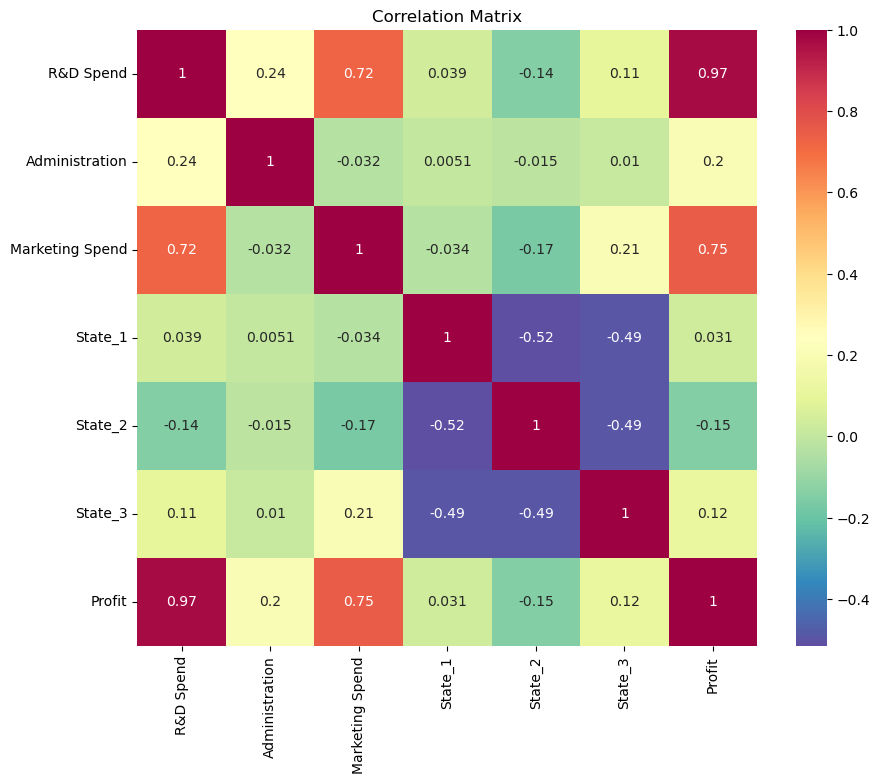

In [24]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral_r")
plt.title("Correlation Matrix")
plt.show()

In [25]:
df["Interaction"] = df["R&D Spend"] * df["Marketing Spend"]

X = df[["R&D Spend", "Marketing Spend", "Interaction"]]  # Updated features
y = df["Profit"]  # Label

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
#  Training the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Profit of the Test Set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.9149371871179751


In [27]:
if r2 >= 0.9:
    print("The model has a good R-squared score of at least 90%.")
else:
    print("The model does not meet the required R-squared score of 90%.")

The model has a good R-squared score of at least 90%.
